# (A) Preprocessing

### Note: You can choose not to review Section (A), which is similar to the pre-processing script from the "Clustering" Workbook. This Section (A) is for preparing the graph and data for our analysis in Section (B) and (C) below.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopy import distance

In [2]:
airlines=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/airlines.csv',
                     index_col=False,header=None, 
                     names=['Airline_ID','Name','Alias','IATA','ICAO','Callsign','Country','Active'])
airports=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/airports.csv',index_col=False,header=None, 
                     names=['Airport_ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude',
                            'Timezone','DST','Tz','Type','Source'])
routes=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/routes.csv',
                   index_col=False,header=None,names=['Airline','Airline_ID',
                                                      'Source_airport','Source_airport_ID','Destination_airport',
                                                      'Destination_airport_ID','Codeshare','Stops',
                                                      'Equipment'])
planes=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/planes.csv',
                   index_col=False,header=None,names=['Name','IATA code','ICAO code'])

In [3]:
airlines.head(5)

Airline_ID                                          Name Alias IATA ICAO  \
0          -1                                       Unknown    \N    -  NaN   
1           1                                Private flight    \N    -  NaN   
2           2                                   135 Airways    \N  NaN  GNL   
3           3                                 1Time Airline    \N   1T  RNX   
4           4  2 Sqn No 1 Elementary Flying Training School    \N  NaN  WYT   

  Callsign         Country Active  
0       \N              \N      Y  
1      NaN             NaN      Y  
2  GENERAL   United States      N  
3  NEXTIME    South Africa      Y  
4      NaN  United Kingdom      N

In [4]:
routes.head(5)

Airline Airline_ID Source_airport Source_airport_ID Destination_airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  Destination_airport_ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

In [5]:
planes.head(5)

Name IATA code ICAO code
0                       Aerospatiale (Nord) 262       ND2      N262
1  Aerospatiale (Sud Aviation) Se.210 Caravelle       CRV      S210
2                  Aerospatiale SN.601 Corvette       NDC      S601
3                Aerospatiale/Alenia ATR 42-300       AT4      AT43
4                Aerospatiale/Alenia ATR 42-500       AT5      AT45

In [6]:
airports.head(5)

Airport_ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     Tz     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [7]:
airports['Continent']=airports['Tz'].str.split('/').str[0]

In [8]:
airports.head(5)

Airport_ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     Tz     Type       Source Continent  
0  Pacific/Port_Moresby  airport  OurAirports   Pacific  
1  Pacific/Port_Moresby  airport  OurAirports   Pacific  
2  Pacific/Port_Moresby  airport  OurAirports   Pacific  
3  Pacific/Port_Moresby  airport  OurAirports   Pacific  
4  Pacific/Port_Moresby  airport  OurAirports   Pacific

In [9]:
#Eliminate the '/N or NaN' and inactive airport routes from dataset
##Create a list(set of unique airport IDs)
airports_routes=[]
for i in list(set(routes['Source_airport_ID']) | set(routes['Destination_airport_ID'])):
    try:
        airports_routes.append(int(i))
    except:
        continue
        
airports_airports=list(airports['Airport_ID'])

airports_cleaned = list(set(airports_routes) & set(airports_airports))
airports_cleaned_str = [str(i) for i in airports_cleaned]

routes_cleaned = routes[routes['Source_airport_ID'].isin(airports_cleaned_str) & 
                        routes['Destination_airport_ID'].isin(airports_cleaned_str)]

airports_cleaned = airports[airports['Airport_ID'].isin(airports_cleaned_str)]

In [10]:
#Show the number of data changes
print(f'Initial number of routes is {len(routes)} and the cleansed number of routes is {len(routes_cleaned)}')
print(f'Initial number of airports is {len(airports)} and the cleansed number of airports is {len(airports_cleaned)}')

Initial number of routes is 67663 and the cleansed number of routes is 66771
Initial number of airports is 7698 and the cleansed number of airports is 3221


In [11]:
country_timezone_df=pd.read_csv('C:/Users/STLEE/Data/NTDS2019_Project-master/NTDS2019_Project-master/data/timezones.csv',
                                encoding='latin-1')

In [12]:
country_timezone_df.head(5)

Country Code    Country Name          Time Zone  GMT Offset
0           AF     Afghanistan         Asia/Kabul  UTC +04:30
1           AX   Aland Islands   Europe/Mariehamn  UTC +03:00
2           AL         Albania      Europe/Tirane  UTC +02:00
3           DZ         Algeria     Africa/Algiers  UTC +01:00
4           AS  American Samoa  Pacific/Pago_Pago  UTC -11:00

In [14]:
country_timezone_df["Continent"] = country_timezone_df["Time Zone"].str.split("/").str[0]

In [15]:
error_candidates = airports[airports.apply(lambda row: row["Tz"].split("/")[0] not in 
                                           country_timezone_df[country_timezone_df["Country Name"] == 
                                                               row["Country"]]["Continent"].unique().tolist(),axis = 1)]

In [16]:
error_candidates

Airport_ID                                    Name  \
250          253                      Port Bouet Airport   
251          254                          Bouaké Airport   
252          255                           Daloa Airport   
253          256                         Korhogo Airport   
254          257                             Man Airport   
255          258                       San Pedro Airport   
256          259                    Yamoussoukro Airport   
649          658              Svalbard Airport, Longyear   
863          883                       Maya-Maya Airport   
864          884                          Owando Airport   
865          885                          Ouesso Airport   
866          886                    Pointe Noire Airport   
997         1020            Ndjili International Airport   
998         1021                           Ndolo Airport   
999         1022                          Muanda Airport   
1000        1023                     Kitona Base Airport   
1001        1024                        Bandundu Airport   
1002        1025                          Kikwit Airport   
1003        1026                        Mbandaka Airport   
1004        1027                       Gbadolite Airport   
1005        1028                          Gemena Airport   
1006        1029                        Kotakoli Airport   
1007        1030                          Lisala Airport   
1008        1031           Bangoka International Airport   
1009        1032                          Matari Airport   
1010        1033                           Bunia Airport   
1011        1034                       Buta Zega Airport   
1012        1035                   Bukavu Kavumu Airport   
1013        1036              Goma International Airport   
1014        1037                           Kindu Airport   
...          ...                                     ...   
7668       13821                          Gitega Airport   
7669       13829  Región de Murcia International Airport   
7670       13830                Fazenda Kajussol Airport   
7671       13880                    Pelee Island Airport   
7672       13881                   Costa Marques Airport   
7673       13891                       Mangalore Airport   
7674       14086          San Isidro del General Airport   
7675       14087                          Zabrat Airport   
7676       14088                         Bezmer Air Base   
7677       14089                        Osovtsy Air Base   
7678       14090                        Yuanmou Air Base   
7679       14091            Changsha Datuopu Airport/AFB   
7680       14092                      Xingcheng Air Base   
7681       14093                       Lefkoniko Airport   
7682       14095                          Songwe Airport   
7683       14096                   Kalocsa/Foktő Airport   
7684       14097                  Bilogai-Sugapa Airport   
7685       14098                        Jakkur Aerodrome   
7686       14099                      Jalal-Abad Airport   
7687       14100                           Ramon Airport   
7688       14101                          Rustaq Airport   
7689       14102                    Laguindingan Airport   
7690       14103                     Kostomuksha Airport   
7691       14104                   Privolzhskiy Air Base   
7692       14105                        Kubinka Air Base   
7693       14106                     Rogachyovo Air Base   
7694       14107                   Ulan-Ude East Airport   
7695       14108                    Krechevitsy Air Base   
7696       14109             Desierto de Atacama Airport   
7697       14110                      Melitopol Air Base   

                       City              Country IATA  ICAO   Latitude  \
250                 Abidjan        Cote d'Ivoire  ABJ  DIAP   5.261390   
251                  Bouake        Cote d'Ivoire  BYK  DIBK   7.738800   
252                   Daloa        Cote d'Ivoire  DJO  DIDL   6

Checkpoint: Save cleaned data

In [18]:
# Save the cleaned data
routes_cleaned.to_csv('data/routes_cleaned.csv',index=False)
airports_cleaned.to_csv('data/airports_cleaned.csv',index=False)

In [19]:
airports

Airport_ID                                         Name  \
0              1                               Goroka Airport   
1              2                               Madang Airport   
2              3                 Mount Hagen Kagamuga Airport   
3              4                               Nadzab Airport   
4              5  Port Moresby Jacksons International Airport   
5              6                  Wewak International Airport   
6              7                           Narsarsuaq Airport   
7              8                      Godthaab / Nuuk Airport   
8              9                        Kangerlussuaq Airport   
9             10                               Thule Air Base   
10            11                             Akureyri Airport   
11            12                          Egilsstaðir Airport   
12            13                         Hornafjörður Airport   
13            14                              Húsavík Airport   
14            15                           Ísafjörður Airport   
15            16               Keflavik International Airport   
16            17                       Patreksfjörður Airport   
17            18                            Reykjavik Airport   
18            19                         Siglufjörður Airport   
19            20                       Vestmannaeyjar Airport   
20            21                      Sault Ste Marie Airport   
21            22               Winnipeg / St. Andrews Airport   
22            23            Halifax / CFB Shearwater Heliport   
23            24                          St. Anthony Airport   
24            25                  Tofino / Long Beach Airport   
25            26                             Kugaaruk Airport   
26            27                          Baie Comeau Airport   
27            28                               CFB Bagotville   
28            29                           Baker Lake Airport   
29            30                       Campbell River Airport   
...          ...                                          ...   
7668       13821                               Gitega Airport   
7669       13829       Región de Murcia International Airport   
7670       13830                     Fazenda Kajussol Airport   
7671       13880                         Pelee Island Airport   
7672       13881                        Costa Marques Airport   
7673       13891                            Mangalore Airport   
7674       14086               San Isidro del General Airport   
7675       14087                               Zabrat Airport   
7676       14088                              Bezmer Air Base   
7677       14089                             Osovtsy Air Base   
7678       14090                             Yuanmou Air Base   
7679       14091                 Changsha Datuopu Airport/AFB   
7680       14092                           Xingcheng Air Base   
7681       14093                            Lefkoniko Airport   
7682       14095                               Songwe Airport   
7683       14096                        Kalocsa/Foktő Airport   
7684       14097                       Bilogai-Sugapa Airport   
7685       14098                             Jakkur Aerodrome   
7686       14099                           Jalal-Abad Airport   
7687       14100                                Ramon Airport   
7688       14101                               Rustaq Airport   
7689       14102                         Laguindingan Airport   
7690       14103                          Kostomuksha Airport   
7691       14104                        Privolzhskiy Air Base   
7692       14105                             Kubinka Air Base   
7693       14106                          Rogachyovo Air Base   
7694       14107                        Ulan-Ude East Airport   
7695       14108                         Krechevitsy Air Base   
7696       14109                  Desierto de Atacama Airport   
7697       14110                         

## A.1. Create nodes

In [20]:
# Load packages for segment
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Checkpoint: Load saved data

In [21]:
# Load previous saved data
routes = pd.read_csv("./data/routes_cleaned.csv")
airports = pd.read_csv("./data/airports_cleaned.csv")

In [22]:
# Get source and destination airports from routes
src_airports = routes[["Source_airport_ID", "Source_airport"]]
src_airports.columns = ["Airport_ID", "Airport"]
dst_airports = routes[["Destination_airport_ID", "Destination_airport"]]
dst_airports.columns = ["Airport_ID", "Airport"]

In [23]:
# Create nodes from airports
nodes = pd.concat([src_airports, dst_airports], axis = 0).drop_duplicates()
nodes.replace(to_replace = "\\N", value = np.NaN, inplace = True)
nodes.dropna(axis = 0, inplace = True)
nodes["Airport_ID"] = nodes["Airport_ID"].apply(int)

In [24]:
airports.columns

Index(['Airport_ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Type', 'Source',
       'Continent'],
      dtype='object')

In [25]:
# Add latitudes, longitudes and continents to nodes
nodes = nodes.merge(right = airports[["Airport_ID", "Latitude", "Longitude", "Tz"]],
                    left_on = "Airport_ID",
                    right_on = "Airport_ID")

nodes.set_index("Airport_ID", inplace = True)
nodes["Tz"] = nodes["Tz"].str.split('/').str[0]

In [26]:
nodes.columns=['Airport','Latitude','Longitude','Continent']
nodes.index.name='Airport_ID'

In [27]:
nodes.head(5)

Airport   Latitude  Longitude Continent
Airport_ID                                        
2965           AER  43.449902  39.956600    Europe
2966           ASF  46.283298  48.006302    Europe
2968           CEK  55.305801  61.503300      Asia
4029           DME  55.408798  37.906300    Europe
6156           EGO  50.643799  36.590099    Europe

In [28]:
nodes.shape

(3214, 4)

In [29]:
N_NODES = nodes.shape[0]

In [30]:
N_NODES

3214

## A.2. Create edges

In [31]:
# Create edges from routes between airports
edges = routes[["Source_airport_ID", "Destination_airport_ID"]]
edges = edges.replace(to_replace = "\\N", value = np.NaN)
edges.dropna(axis = 0, inplace = True)

# Convert edges id to int
edges["Source_airport_ID"] = edges["Source_airport_ID"].apply(int)
edges["Destination_airport_ID"] = edges["Destination_airport_ID"].apply(int)

In [32]:
edges.head()

Source_airport_ID  Destination_airport_ID
0               2965                    2990
1               2966                    2990
2               2966                    2962
3               2968                    2990
4               2968                    4078

In [33]:
# Create mapping from airport id to node id
airport_id2idx = pd.DataFrame(nodes.index.unique())

In [34]:
nodes.index.unique()

Int64Index([2965, 2966, 2968, 4029, 6156, 2922, 2952, 2990, 2948, 2962,
            ...
            1040, 2697, 1463, 7158, 7135, 8259, 7370, 6372, 4125, 7369],
           dtype='int64', name='Airport_ID', length=3214)

In [35]:
##reset_index() creates a new column (running digits-prior index) and a new index (running digits)
airport_id2idx = airport_id2idx.reset_index().set_index("Airport_ID")

In [36]:
airport_id2idx.columns = ["nodes_idx"]

In [37]:
airport_id2idx.head(5)

nodes_idx
Airport_ID           
2965                0
2966                1
2968                2
4029                3
6156                4

In [38]:
# Add node_ids to edges for adjacency matrix construction
## inner merge(join) on left edge table via 'Source_airport_ID' with right 'airport_id2idx' table via its index or"Airport_ID".
edges = edges.merge(right = airport_id2idx,
                   left_on = "Source_airport_ID",
                   right_index = True,
                   sort = False)

## Do the same for "Destination_airport_ID"
edges = edges.merge(right = airport_id2idx,
                   left_on = "Destination_airport_ID",
                   right_index = True,
                   sort = False,
                   suffixes = ["_src", "_dst"])

## Eliminate duplicate edges (just in case)
edges.drop_duplicates(inplace = True)

In [39]:
edges.head(5)

Source_airport_ID  Destination_airport_ID  nodes_idx_src  nodes_idx_dst
0               2965                    2990              0              7
1               2966                    2990              1              7
3               2968                    2990              2              7
5               4029                    2990              3              7
9               6156                    2990              4              7

## A.3. Create adjacency matrix

### A.3.1. Create non-weighted adjacency matrix

In [40]:
adjacency = np.zeros([N_NODES, N_NODES])
adjacency

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
## Convert dataframe to array (.values or .to_numpy()) and transpose (.T) the shape of the array
pairs = edges[["nodes_idx_src", "nodes_idx_dst"]].values.T

In [42]:
## Create tuple ([......],[......]) as coordinates for matrix
tuple(pairs.tolist())

([0,
  1,
  2,
  3,
  4,
  8,
  14,
  83,
  233,
  237,
  339,
  411,
  562,
  745,
  746,
  747,
  749,
  750,
  752,
  1697,
  1902,
  0,
  2,
  3,
  7,
  8,
  9,
  10,
  13,
  14,
  18,
  308,
  339,
  346,
  406,
  409,
  441,
  644,
  645,
  745,
  747,
  748,
  749,
  751,
  752,
  766,
  772,
  777,
  1723,
  2365,
  2492,
  2805,
  0,
  3,
  8,
  51,
  83,
  180,
  213,
  226,
  419,
  436,
  439,
  441,
  457,
  460,
  476,
  481,
  482,
  483,
  658,
  749,
  751,
  956,
  957,
  959,
  2146,
  0,
  3,
  5,
  6,
  8,
  14,
  50,
  51,
  57,
  121,
  126,
  211,
  329,
  427,
  429,
  439,
  441,
  442,
  444,
  460,
  461,
  466,
  482,
  484,
  562,
  635,
  636,
  645,
  656,
  658,
  748,
  749,
  766,
  957,
  969,
  1065,
  1066,
  1320,
  1449,
  1702,
  1703,
  0,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  13,
  14,
  18,
  155,
  162,
  169,
  232,
  233,
  234,
  235,
  236,
  237,
  269,
  294,
  308,
  329,
  334,
  337,
  339,
  340,
  346,
  406,
  429,
  439,
  441,
 

In [43]:
## example: arr2d[[2,4,6,6],[2,4,6,7]] = 1, assign 1 to each of the matrice coordinate.
adjacency[tuple(pairs.tolist())] = 1

In [44]:
## edges are undirected, hence we make both sides of the matrix symmetrical. Then, we make those with values into a Boolean.
adjacency = (adjacency + adjacency.T) > 0

In [45]:
#np.identity(N_NODES) creates an eye based on shape of N_NODES. 1-np.identity(N_NODES) result in a matrix of 1 less the eye.
#Reason: To remove all self-referencing nodes (e.g. 1001,1001)
#multiplying by adjacency result in only nodes with value 1 in the matrix. (rest is 0*...=0)
adjacency = adjacency * (1 - np.identity(N_NODES))

In [45]:
# for saving matrix array as text (did this for verification of matrix)
#np.savetxt("foo.csv", adjacency, delimiter=",")

In [46]:
adjacency

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### A.3.1.1. Create largest connected unweighted component graph

In [47]:
# Create largest connected component graph
G = nx.from_numpy_matrix(adjacency)

largest_cc_unweighted = max(nx.connected_component_subgraphs(G), key = len)

### A.3.2. Create laplacian kernel weighted adjacency matrix

In [48]:
# Set sigma value 
sigma = 1200

In [49]:
# Calculate the distance between airports for edge weights
dists = edges.merge(nodes[["Airport", "Latitude", "Longitude"]],
                   left_on = "Source_airport_ID",
                   right_index = True)

dists = dists.merge(nodes[["Airport", "Latitude", "Longitude"]],
                   left_on = "Destination_airport_ID",
                   right_index = True,
                   suffixes = ("_src", "_dst"))

dists["distance"] = dists.apply(lambda row: distance.geodesic(row[["Latitude_src", "Longitude_src"]].values,
                                                              row[["Latitude_dst", "Longitude_dst"]].values).km,axis = 1)

In [50]:
# Eliminate self ending edges' entries
# filter out false output from apply
dists = dists[dists.apply(lambda row: row["Source_airport_ID"] != row["Destination_airport_ID"],
                           axis = 1)]

In [51]:
# Obtain statistics of distance
dists[["distance"]].describe()

distance
count  36906.000000
mean    1760.875394
std     1946.088833
min        2.832833
25%      571.716646
50%     1156.245634
75%     2092.216138
max    16089.885579

In [52]:
# Save dists
dists.to_csv("./data/dists.csv", index = False)

In [53]:
# Create heat kernel adjacency matrix from distance
laplacian_kernel_adjacency = np.zeros((N_NODES, N_NODES))
pairs = dists[["nodes_idx_src", "nodes_idx_dst"]].values.T
laplacian_kernel_adjacency[tuple(pairs.tolist())] = np.exp(-dists["distance"] / sigma)
laplacian_kernel_adjacency 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# Make the matrix symmetric
unsym_coors = np.array(np.where(laplacian_kernel_adjacency != laplacian_kernel_adjacency.T))

unsym_src = tuple(np.concatenate([unsym_coors, unsym_coors[::-1]], axis = 1).tolist())
unsym_tgt = tuple(np.concatenate([unsym_coors[::-1], unsym_coors], axis = 1).tolist())

laplacian_kernel_adjacency[unsym_src] += laplacian_kernel_adjacency[unsym_tgt]

In [55]:
dists.head()

Source_airport_ID  Destination_airport_ID  nodes_idx_src  nodes_idx_dst  \
0               2965                    2990              0              7   
1               2966                    2990              1              7   
3               2968                    2990              2              7   
5               4029                    2990              3              7   
9               6156                    2990              4              7   

  Airport_src  Latitude_src  Longitude_src Airport_dst  Latitude_dst  \
0         AER     43.449902      39.956600         KZN     55.606201   
1         ASF     46.283298      48.006302         KZN     55.606201   
3         CEK     55.305801      61.503300         KZN     55.606201   
5         DME     55.408798      37.906300         KZN     55.606201   
9         EGO     50.643799      36.590099         KZN     55.606201   

   Longitude_dst     distance  
0      49.278702  1507.989680  
1      49.278702  1040.943207  
3      49.278702   773.126239  
5      49.278702   718.084202  
9      49.278702  1010.815885

In [56]:
nodes.head()

Airport   Latitude  Longitude Continent
Airport_ID                                        
2965           AER  43.449902  39.956600    Europe
2966           ASF  46.283298  48.006302    Europe
2968           CEK  55.305801  61.503300      Asia
4029           DME  55.408798  37.906300    Europe
6156           EGO  50.643799  36.590099    Europe

In [57]:
airports[airports["City"] == "Istanbul"]

Airport_ID                                 Name      City Country IATA  \
770         1701        Atatürk International Airport  Istanbul  Turkey  ISL   
2185        4317  Sabiha Gökçen International Airport  Istanbul  Turkey  SAW   

      ICAO   Latitude  Longitude  Altitude Timezone DST               Tz  \
770   LTBA  40.976898    28.8146       163        3   E  Europe/Istanbul   
2185  LTFJ  40.898602    29.3092       312        3   E  Europe/Istanbul   

         Type       Source Continent  
770   airport  OurAirports    Europe  
2185  airport  OurAirports    Europe

In [58]:
airports.head()

Airport_ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     Tz     Type       Source Continent  
0  Pacific/Port_Moresby  airport  OurAirports   Pacific  
1  Pacific/Port_Moresby  airport  OurAirports   Pacific  
2  Pacific/Port_Moresby  airport  OurAirports   Pacific  
3  Pacific/Port_Moresby  airport  OurAirports   Pacific  
4  Pacific/Port_Moresby  airport  OurAirports   Pacific

### A.3.2.1 Create largest component matrix for heat kernel adjacency matrix

In [59]:
# Create largest connected component graph
G = nx.from_numpy_matrix(laplacian_kernel_adjacency)

largest_cc = max(nx.connected_component_subgraphs(G), key = len)

In [60]:
# Get matrix indices of largest connected component graph
indices = list(largest_cc.nodes)

In [61]:
# Create largest connected component matrix
largest_cc_matrix = laplacian_kernel_adjacency[indices]
largest_cc_matrix = largest_cc_matrix[:, indices]

In [62]:
# Create back-up copy of largest_cc_matrix
np.save("data/largest_cc_matrix.npy", largest_cc_matrix,allow_pickle=True)
##test2 = np.load('data/largest_cc_matrix.npy')
##np.savetxt("foo2.csv", test3, delimiter=",") ##saving matrices in text

In [63]:
# Create mapping from idx to airport id
idx2airport_id = airport_id2idx.reset_index().set_index("nodes_idx")

In [64]:
mapping = dict(zip(range(len(indices)), indices))

In [65]:
# Create mapping from largest connected component idx to airport id
new_mapping = dict()

for key in mapping.keys():
    new_mapping[key] = idx2airport_id.loc[mapping[key]].values[0]

In [66]:
np.save("data/mapping.npy", new_mapping,allow_pickle=True)
#heat_kernel_adjacency = np.load('data/mapping.npy',allow_pickle=True)

In [67]:
mapping_index_airport = new_mapping

In [68]:
airports_key_id = airports.set_index('Airport_ID')

# (B) Running Label Propagation Algorithm on Weighted (Distance) Graph

### We used the "Label Propagation Algorithm", following its best performance demonstrated in the earlier section, to detect communities in the weighted (distance) graph. We will perform further analysis on airline networks using the detected airport communities in Section (C) below.

In [69]:
# Load packages for segment
# Import clustering and visualisation packages
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopy import distance
import pickle
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from sklearn.cluster import SpectralClustering
import folium
from sklearn.cluster import KMeans
from tqdm import tqdm
tqdm.pandas()

In [70]:
#Load routes with distance
dists_df = dists
#Load the code below if you are starting from here and have a pre-saved file from earlier section.
#dists_df = pd.read_csv("./data/dists.csv")

In [71]:
# Create graph from distances dataframe
G = nx.from_pandas_edgelist(dists_df, 
                            "Source_airport_ID",
                           "Destination_airport_ID",
                           ["distance"])

In [72]:
largest_cc = max(nx.connected_component_subgraphs(G), key = len)

In [73]:
labelP = nx.algorithms.community.label_propagation_communities(largest_cc)

In [74]:
lp_comms= sorted(list(labelP), key=len, reverse=True)

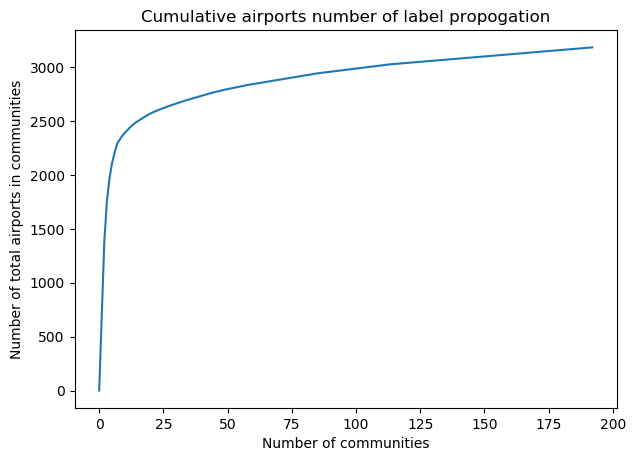

In [75]:
cnt = 0
records = []

for i in lp_comms:
    records.append(cnt)
    cnt += len(i)

plt.figure(figsize=(7,5), dpi=100)
plt.plot(records)
plt.xlabel('Number of communities')
plt.ylabel('Number of total airports in communities')
plt.title('Cumulative airports number of label propogation');

In [76]:
colorMap = {
    0: 'darkgreen',
    1: 'yellow',
    2: 'purple',
    3: 'lightgreen',
    4: 'orange',
    5: 'grey',
    6: 'black',
    7: 'darkblue',
    8: 'darkred',
    9: 'pink'
}

In [77]:
colorMaptemp=dict(enumerate(matplotlib.colors.cnames.keys()))

In [78]:
colorMaptempno=max(colorMap.keys())
for i in colorMaptemp.values():
    if i not in colorMap.values():
        colorMaptempno+=1
        colorMap.update({colorMaptempno:i})

In [79]:
test = []
for i_comm in range(len(lp_comms)):
    for airport_id in lp_comms[i_comm]:
        test.append(airport_id)

In [80]:
lp_comms = lp_comms

airport_id_color = {}

for i_comm in range(len(lp_comms)):
    for airport_id in lp_comms[i_comm]:
        try:
            airport_id_color[airport_id] = colorMap[i_comm]
        except:
            airport_id_color[airport_id] = 'white'

In [81]:
map_lp = folium.Map(tiles="openstreetmap")

for k, v in mapping_index_airport.items():
    if v not in airport_id_color.keys():
        continue
    airport = airports_key_id.loc[v]
    airport = airports_key_id.loc[v]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                        radius=2,
                        fill=True,
                        opacity=0.0,
                        fill_color=airport_id_color[v],
                        fill_opacity=0.7
                       ).add_to(map_lp)
    
map_lp.save('data/map_lp.html')

In [82]:
map_lp

In [83]:
nx.algorithms.community.quality.coverage(largest_cc,lp_comms)

0.8532363404662029

In [84]:
nx.algorithms.community.quality.modularity(largest_cc,lp_comms)

0.612305352304134

In [85]:
nx.algorithms.community.quality.performance(largest_cc,lp_comms)

0.885799194421818

# (C) Analysis of Communities: Airports and Airlines

## C.1. Visualisation of Airlines Interaction with Airport Communities

### C.1.1. Visualisation of International Airlines: Singapore Airlines Network

In [86]:
# 'SQ' is the abbreviation code in the routes data sheet which represent Singapore Airlines
turkey_airline = routes[routes['Airline']=='SQ']

In [87]:
map_turkey = folium.Map(tiles="openstreetmap")
turkey_points = []
airports_key_id = airports.set_index('Airport_ID')

# Put points in
for index, t_a in turkey_airline.iterrows():
    src_airport_id = t_a['Source_airport_ID']
    dest_airport_id = t_a['Destination_airport_ID']
    
    if src_airport_id not in turkey_points:
        turkey_points.append(src_airport_id)
    
    if dest_airport_id not in turkey_points:
        turkey_points.append(dest_airport_id)

# Draw the point
for airport_id in turkey_points:
    airport = airports_key_id.loc[airport_id]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                    radius=2,
                    fill=True,
                    opacity=0.0,
                    fill_color=airport_id_color[airport_id],
                    fill_opacity=0.7
                   ).add_to(map_turkey)

# Draw the lines
for index, route in turkey_airline.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.5, opacity=1).add_to(map_turkey)

map_turkey.save('data/map_turkey.html')

In [88]:
map_turkey

### C.1.2. Visualisation of International Airlines: United Emirates Airlines Network

In [89]:
# Load the airline abbreviation code and filter out the routes
turkey_airline = routes[routes['Airline']=='EK']

In [90]:
map_turkey = folium.Map(tiles="openstreetmap")
turkey_points = []
airports_key_id = airports.set_index('Airport_ID')

# Put points in
for index, t_a in turkey_airline.iterrows():
    src_airport_id = t_a['Source_airport_ID']
    dest_airport_id = t_a['Destination_airport_ID']
    
    if src_airport_id not in turkey_points:
        turkey_points.append(src_airport_id)
    
    if dest_airport_id not in turkey_points:
        turkey_points.append(dest_airport_id)

# Draw the point
for airport_id in turkey_points:
    airport = airports_key_id.loc[airport_id]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                    radius=2,
                    fill=True,
                    opacity=0.0,
                    fill_color=airport_id_color[airport_id],
                    fill_opacity=0.7
                   ).add_to(map_turkey)

# Draw the lines
for index, route in turkey_airline.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.5, opacity=1).add_to(map_turkey)

map_turkey.save('data/map_turkey.html')

In [91]:
map_turkey

### C.1.3. Visualisation of Domestic (Pre-dominantly) Airlines: JetBlue Airlines Routes

In [92]:
# Load the airline abbreviation code and filter out the routes
turkey_airline = routes[routes['Airline']=='B6']

In [93]:
map_turkey = folium.Map(tiles="openstreetmap")
turkey_points = []
airports_key_id = airports.set_index('Airport_ID')

# Put points in
for index, t_a in turkey_airline.iterrows():
    src_airport_id = t_a['Source_airport_ID']
    dest_airport_id = t_a['Destination_airport_ID']
    
    if src_airport_id not in turkey_points:
        turkey_points.append(src_airport_id)
    
    if dest_airport_id not in turkey_points:
        turkey_points.append(dest_airport_id)

# Draw the point
for airport_id in turkey_points:
    airport = airports_key_id.loc[airport_id]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                    radius=2,
                    fill=True,
                    opacity=0.0,
                    fill_color=airport_id_color[airport_id],
                    fill_opacity=0.7
                   ).add_to(map_turkey)

# Draw the lines
for index, route in turkey_airline.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.5, opacity=1).add_to(map_turkey)

map_turkey.save('data/map_turkey.html')

In [94]:
map_turkey

### C.1.4. Visualisation of Domestic (Pre-dominantly) Airlines: Southwest Airlines Routes

In [95]:
# Load the airline abbreviation code and filter out the routes
turkey_airline = routes[routes['Airline']=='WN']

In [96]:
map_turkey = folium.Map(tiles="openstreetmap")
turkey_points = []
airports_key_id = airports.set_index('Airport_ID')

# Put points in
for index, t_a in turkey_airline.iterrows():
    src_airport_id = t_a['Source_airport_ID']
    dest_airport_id = t_a['Destination_airport_ID']
    
    if src_airport_id not in turkey_points:
        turkey_points.append(src_airport_id)
    
    if dest_airport_id not in turkey_points:
        turkey_points.append(dest_airport_id)

# Draw the point
for airport_id in turkey_points:
    airport = airports_key_id.loc[airport_id]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                    radius=2,
                    fill=True,
                    opacity=0.0,
                    fill_color=airport_id_color[airport_id],
                    fill_opacity=0.7
                   ).add_to(map_turkey)

# Draw the lines
for index, route in turkey_airline.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.5, opacity=1).add_to(map_turkey)

map_turkey.save('data/map_turkey.html')

In [97]:
map_turkey

## C.2. Inter-Community Interaction: Airlines Competitor Analysis

Using the community detected in our earlier label propagation algorithm, we performed more detailed competitor analysis: searching for the airlines with the most similar community portfolio/sets and also look at the differences in community sets.

In [98]:
def airport_list(airline_abbreviation):
    turkey_airline = routes[routes['Airline_ID']==str(airline_abbreviation)]
    turkey_points = []
    airports_key_id = airports.set_index('Airport_ID')

    # Put points in
    for index, t_a in turkey_airline.iterrows():
        src_airport_id = t_a['Source_airport_ID']
        dest_airport_id = t_a['Destination_airport_ID']
    
        if src_airport_id not in turkey_points:
            turkey_points.append(src_airport_id)
    
        if dest_airport_id not in turkey_points:
            turkey_points.append(dest_airport_id)
    
    return turkey_points

In [99]:
airlines['Unique_airports']=airlines['Airline_ID'].apply(airport_list)

In [100]:
airlines.head(5)

Airline_ID                                          Name Alias IATA ICAO  \
0          -1                                       Unknown    \N    -  NaN   
1           1                                Private flight    \N    -  NaN   
2           2                                   135 Airways    \N  NaN  GNL   
3           3                                 1Time Airline    \N   1T  RNX   
4           4  2 Sqn No 1 Elementary Flying Training School    \N  NaN  WYT   

  Callsign         Country Active Unique_airports  
0       \N              \N      Y              []  
1      NaN             NaN      Y              []  
2  GENERAL   United States      N              []  
3  NEXTIME    South Africa      Y              []  
4      NaN  United Kingdom      N              []

In [101]:
def check_community(airport_list):
    community_list=[]
    for s in airport_list:
        for i in lp_comms:
            if s in i:
                if i not in community_list:
                    community_list.append(i)
    return community_list

In [102]:
airlines['Communities']=airlines['Unique_airports'].progress_apply(check_community)

100%|██████████| 6162/6162 [00:00<00:00, 29143.53it/s]


In [103]:
airlines['Communities_no']=airlines['Communities'].progress_apply(len)

100%|██████████| 6162/6162 [00:00<00:00, 1024509.50it/s]


In [104]:
airlines.nlargest(5,'Communities_no')

Airline_ID               Name Alias IATA ICAO  Callsign        Country  \
5196        5209    United Airlines    \N   UA  UAL    UNITED  United States   
439          439    Alaska Airlines    \N   AS  ASA      Inc.         ALASKA   
3198        3200       LAN Airlines    \N   LA  LAN       LAN          Chile   
5828       16726         Era Alaska   NaN   7H  ERR      ERAH  United States   
24            24  American Airlines    \N   AA  AAL  AMERICAN  United States   

     Active                                    Unique_airports  \
5196      Y  [4355, 3830, 253, 302, 298, 246, 4019, 3751, 3...   
439       Y  [4019, 3484, 5959, 3774, 3531, 3794, 5719, 357...   
3198      Y  [2749, 2709, 2715, 2442, 2501, 2513, 2443, 248...   
5828      Y  [7177, 3693, 7117, 3531, 3774, 7220, 6714, 357...   
24        Y  [4355, 3876, 3752, 3718, 3670, 4019, 3484, 383...   

                                            Communities  Communities_no  
5196  [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...              18  
439   [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...              17  
3198  [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...              16  
5828  [{7177, 7180, 3693, 7182, 7117, 3413}, {7160, ...              16  
24    [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...              14

In [105]:
airlines_copy=airlines.copy()

In [106]:
# Subject (Airline) for analysis:
subject=4435

In [107]:
def competitoradvantage(x):
    common_list=[]
    competitor_advantage=[]
    for i in x:
        if i in airlines_copy.loc[airlines_copy['Airline_ID']==subject,'Communities'].values[0]:
            common_list.append(i)
        else:
            competitor_advantage.append(i)
    return competitor_advantage

In [108]:
airlines_copy['Competitor_Cluster_Advantage']=airlines_copy['Communities'].progress_apply(competitoradvantage)

100%|██████████| 6162/6162 [00:00<00:00, 11240.99it/s]


In [109]:
def subjectadvantage(x):
    subject_advantage=[]
    for i in airlines_copy.loc[airlines_copy['Airline_ID']==subject,'Communities'].values[0]:
        if i not in x:
            subject_advantage.append(i)
    return subject_advantage

In [110]:
airlines_copy['Subject_Cluster_Advantage']=airlines_copy['Communities'].progress_apply(subjectadvantage)

100%|██████████| 6162/6162 [00:02<00:00, 2932.35it/s]


In [111]:
def jaccard(x):
    common_list=[]
    competitor_advantage=[]
    subject_advantage=[]
    for i in x:
        if i in airlines_copy.loc[airlines_copy['Airline_ID']==subject,'Communities'].values[0]:
            common_list.append(i)
        else:
            competitor_advantage.append(i)
    for i in airlines_copy.loc[airlines_copy['Airline_ID']==subject,'Communities'].values[0]:
        if i not in x:
            subject_advantage.append(i)
    return len(common_list)/(len(common_list)+len(competitor_advantage)+len(subject_advantage))

In [112]:
airlines_copy['Cluster_Jaccard']=airlines_copy['Communities'].progress_apply(jaccard)

100%|██████████| 6162/6162 [00:02<00:00, 2354.45it/s]


In [113]:
airlines_copy['No_of_airports']=airlines_copy['Unique_airports'].apply(len)

### List below shows the airlines with the closest community sets with our target (Singapore Airlines) and also identified the pairwise differences in community sets:

In [114]:
airlines_copy[['Airline_ID','Name','Unique_airports','No_of_airports','Communities','Communities_no','Competitor_Cluster_Advantage','Subject_Cluster_Advantage','Cluster_Jaccard']].nlargest(5,'Cluster_Jaccard')

Airline_ID                Name  \
4427        4435  Singapore Airlines   
751          751           Air China   
2182        2183            Emirates   
3161        3163          Korean Air   
28            28     Asiana Airlines   

                                        Unique_airports  No_of_airports  \
4427  [1107, 3885, 3341, 3316, 2006, 2994, 580, 1218...             102   
751   [1107, 3370, 3364, 2006, 3406, 6404, 3395, 737...             186   
2182  [253, 248, 2188, 1107, 3341, 2006, 3320, 3339,...             135   
3161  [2006, 3930, 580, 2340, 3682, 2560, 3797, 2650...             118   
28    [1107, 4059, 2006, 2279, 2908, 3930, 3682, 379...             105   

                                            Communities  Communities_no  \
4427  [{4105, 16, 8209, 4130, 4160, 4161, 4162, 4166...              12   
751   [{4105, 16, 8209, 4130, 4160, 4161, 4162, 4166...              11   
2182  [{4105, 16, 8209, 4130, 4160, 4161, 4162, 4166...              11   
3161  [{2006, 2007, 2009, 2011, 2012, 2014, 2015, 20...              11   
28    [{4105, 16, 8209, 4130, 4160, 4161, 4162, 4166...               9   

                      Competitor_Cluster_Advantage  \
4427                                            []   
751   [{6372, 6373, 6374, 7558, 6795, 7470, 3380}]   
2182                    [{6289, 4217, 6337, 6238}]   
3161  [{6372, 6373, 6374, 7558, 6795, 7470, 3380}]   
28                                              []   

                              Subject_Cluster_Advantage  Cluster_Jaccard  
4427                                                 []         1.000000  
751   [{9888, 9889, 3250, 3886}, {3240, 3241, 3243, ...         0.769231  
2182  [{9888, 9889, 3250, 3886}, {3240, 3241, 3243, ...         0.769231  
3161  [{9888, 9889, 3250, 3886}, {3240, 3241, 3243, ...         0.769231  
28    [{2560, 2562, 2564, 2569, 2570, 2572, 2575, 25...         0.750000

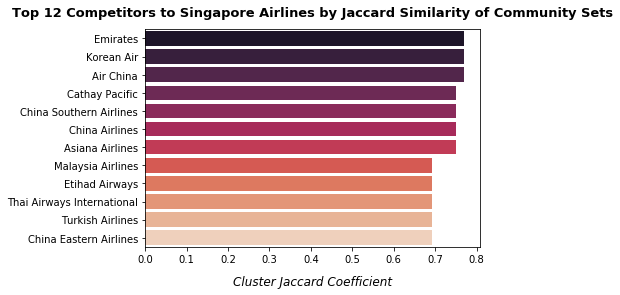

In [115]:
plotresult=airlines_copy[airlines_copy['Cluster_Jaccard']<1].sort_values('Cluster_Jaccard').nlargest(12,'Cluster_Jaccard')
sns.barplot(x='Cluster_Jaccard',y='Name',data=airlines_copy[airlines_copy['Cluster_Jaccard']<1],order=plotresult['Name'],palette="rocket")
plt.title('Top 12 Competitors to Singapore Airlines by Jaccard Similarity of Community Sets',fontsize=13, fontweight="bold",pad=13)
plt.ylabel('', fontsize=12, labelpad=13)
plt.xlabel('Cluster Jaccard Coefficient', fontsize=12, labelpad=11, fontstyle='italic')
plt.show()

## C.3. Airline - Intra-Community Interaction: Competitor Analysis

We take a step further and analyse the Airline network performance within a community. In this case, we chose one of the community: America, for analysis into the various airline network within this community.

In [116]:
airlines_copy2=airlines.copy()

In [117]:
airlines_copy2

Airline_ID                                          Name  \
0             -1                                       Unknown   
1              1                                Private flight   
2              2                                   135 Airways   
3              3                                 1Time Airline   
4              4  2 Sqn No 1 Elementary Flying Training School   
5              5                               213 Flight Unit   
6              6                 223 Flight Unit State Airline   
7              7                             224th Flight Unit   
8              8                                   247 Jet Ltd   
9              9                                   3D Aviation   
10            10                                   40-Mile Air   
11            11                                        4D Air   
12            12                        611897 Alberta Limited   
13            13                              Ansett Australia   
14            14                          Abacus International   
15            15                               Abelag Aviation   
16            16                                Army Air Corps   
17            17                     Aero Aviation Centre Ltd.   
18            18     Aero Servicios Ejecutivos Internacionales   
19            19                                   Aero Biniza   
20            20                                 Aero Albatros   
21            21                                    Aigle Azur   
22            22                                Aloha Airlines   
23            23                             Alaska Island Air   
24            24                             American Airlines   
25            25               Aviation Management Corporation   
26            26                       Atlantis Airlines (USA)   
27            27                            Aerovista Airlines   
28            28                               Asiana Airlines   
29            29                               Askari Aviation   
...          ...                                           ...   
6132       20827                                    Fly France   
6133       20875                                 Jota Aviation   
6134       20881                                    Europe Jet   
6135       20923                                        COBALT   
6136       20931                      Southern Airways Express   
6137       20961       Deutsche Luftverkehrsgesellschaft (DLT)   
6138       20962                                   Orenburzhie   
6139       20963                            Atlantic Air Cargo   
6140       20976                          World Scale Airlines   
6141       20978                                All America US   
6142       20986   University of Birmingham Air Squadron (RAF)   
6143       20991                                Choice Airways   
6144       20994                                Aruba Airlines   
6145       20995                                     BudgetAir   
6146       20996                               Dynamic Airways   
6147       21012                                       Fly One   
6148       21021                                       Nordica   
6149       21036                              Tez Jet Airlines   
6150       21043                                      Kush Air   
6151       21056                                         Dummy   
6152       21124                                        ViaAir   
6153       21131                              All America BOPY   
6154       21179                              Thai Vietjet Air   
6155       21181                              Air Andaman (2Y)   
6156       21240                     TDA Toa Domestic Airlines   
6157       21248                                   GX Airlines   
6158       21251                        Lynx Aviation (L3/SSX)   
6159       21268                               Jetgo Australia   
6160       21270                              

In [118]:
# function to retrieve the community set of a specific airport
def targetcommunity(airportid):
    for i in lp_comms:
        if airportid in i:
            return i

In [119]:
# Pick any random community. Lets pick a community in the US using one of its airport_id (3682) or Atlanta airport
# Retrieve its community set:
target_community=targetcommunity(3682)
# Filter out airlines that travel to that specific community (may or may not have domestic flights there)
# (i.e. note that some could fly to our target community from another community but never fly within our target community)
airlines_copy3=airlines_copy2[[target_community in x for x in airlines_copy2['Communities']]]
airlines_copy3=airlines_copy3.copy()

In [120]:
airlines_copy3

Airline_ID                                       Name  \
24            24                          American Airlines   
28            28                            Asiana Airlines   
35            35                              Allegiant Air   
90            90                                 Air Europa   
96            96                            Aegean Airlines   
109          109                     Alaska Central Express   
130          130                  Aeroflot Russian Airlines   
137          137                                 Air France   
179          179                                    Aeroper   
214          214                                 Air Berlin   
218          218                          Air India Limited   
221          221                      Air Atlanta Icelandic   
225          225                             Air Tahiti Nui   
321          321                                 AeroMéxico   
324          324                         All Nippon Airways   
330          330                                 Air Canada   
341          341                 Air North Charter - Canada   
345          345                            Air New Zealand   
386          386                                Aero Flight   
412          412                      Aerolineas Argentinas   
439          439                            Alaska Airlines   
462          462                         Astrakhan Airlines   
477          477                           Air Saint Pierre   
491          491                          Austrian Airlines   
502          502                     Abu Dhabi Amiri Flight   
515          515  Avianca - Aerovias Nacionales de Colombia   
567          567                               Air Caraïbes   
596          596                                   Alitalia   
603          603                                  Amaszonas   
622          622                            Aserca Airlines   
...          ...                                        ...   
5533        8809                            Island Air (WP)   
5551        9666                             Virgin Pacific   
5590       10646                        Birmingham European   
5591       10650                               Pal airlines   
5600       10739                             Air Choice One   
5605       10765                           SeaPort Airlines   
5606       10776                                 Salmon Air   
5624       11741                       Air Antilles Express   
5629       11763                          Peruvian Airlines   
5639       11806           Compagnie Africaine d\\'Aviation   
5739       14849                      Aereonautica militare   
5775       16149                   Windward Islands Airways   
5800       16475                   TUR Avrupa Hava YollarÄ±   
5808       16615         Mongolian International Air Lines    
5814       16660                                 AeroWorld    
5828       16726                                 Era Alaska   
5843       16844                                BVI Airways   
5880       17519                             SENIC AIRLINES   
5910       17885                  Interjet (ABC Aerolineas)   
5927       18169                            Patriot Airways   
5930       18232                          BQB Lineas Aereas   
5940       18529                                   T.J. Air   
5956       18700                           SOCHI AIR CHATER   
5972       18944                  Insel Air (7I/INC) (Priv)   
6038       19810                       Regional Air Iceland   
6068       20004                         Volotea Costa Rica   
6106       20565                        Boutique Air (Priv)   
6117       20686                        SkyBahamas Airlines   
6120       20710                        Silver Airways (3M)   
6140       20976                       World Scale Airlines   

                       Alias IATA ICAO         Callsign  \
24                        \N   AA  AAL  

In [121]:
# Extract all domestic routes in that specific community
# Make sure all source and destination airports are from the specific community
filterroutes = routes[routes['Source_airport_ID'].isin(target_community) & routes['Destination_airport_ID'].isin(target_community)]

In [122]:
def domesticsearch(airline_id):
    filterroutes2 = filterroutes[filterroutes['Airline_ID']==str(airline_id)]
    idxs = list(zip(filterroutes2.Source_airport_ID.values, filterroutes2.Destination_airport_ID.values))

    #subset of dists for the specific airline
    subset = dists[pd.Series(list(zip(dists.Source_airport_ID, dists.Destination_airport_ID)), index=dists.index).isin(idxs)]

    # Create graph from distances dataframe
    G = nx.from_pandas_edgelist(subset,"Source_airport_ID","Destination_airport_ID",["distance"],create_using=nx.DiGraph())
    
    return [c for c in sorted(nx.strongly_connected_components(G),key=len, reverse=True)]

In [123]:
airlines_copy3['SCC']=airlines_copy3['Airline_ID'].progress_apply(domesticsearch)

100%|██████████| 191/191 [00:04<00:00, 43.43it/s]


In [124]:
airlines_copy3

Airline_ID                                       Name  \
24            24                          American Airlines   
28            28                            Asiana Airlines   
35            35                              Allegiant Air   
90            90                                 Air Europa   
96            96                            Aegean Airlines   
109          109                     Alaska Central Express   
130          130                  Aeroflot Russian Airlines   
137          137                                 Air France   
179          179                                    Aeroper   
214          214                                 Air Berlin   
218          218                          Air India Limited   
221          221                      Air Atlanta Icelandic   
225          225                             Air Tahiti Nui   
321          321                                 AeroMéxico   
324          324                         All Nippon Airways   
330          330                                 Air Canada   
341          341                 Air North Charter - Canada   
345          345                            Air New Zealand   
386          386                                Aero Flight   
412          412                      Aerolineas Argentinas   
439          439                            Alaska Airlines   
462          462                         Astrakhan Airlines   
477          477                           Air Saint Pierre   
491          491                          Austrian Airlines   
502          502                     Abu Dhabi Amiri Flight   
515          515  Avianca - Aerovias Nacionales de Colombia   
567          567                               Air Caraïbes   
596          596                                   Alitalia   
603          603                                  Amaszonas   
622          622                            Aserca Airlines   
...          ...                                        ...   
5533        8809                            Island Air (WP)   
5551        9666                             Virgin Pacific   
5590       10646                        Birmingham European   
5591       10650                               Pal airlines   
5600       10739                             Air Choice One   
5605       10765                           SeaPort Airlines   
5606       10776                                 Salmon Air   
5624       11741                       Air Antilles Express   
5629       11763                          Peruvian Airlines   
5639       11806           Compagnie Africaine d\\'Aviation   
5739       14849                      Aereonautica militare   
5775       16149                   Windward Islands Airways   
5800       16475                   TUR Avrupa Hava YollarÄ±   
5808       16615         Mongolian International Air Lines    
5814       16660                                 AeroWorld    
5828       16726                                 Era Alaska   
5843       16844                                BVI Airways   
5880       17519                             SENIC AIRLINES   
5910       17885                  Interjet (ABC Aerolineas)   
5927       18169                            Patriot Airways   
5930       18232                          BQB Lineas Aereas   
5940       18529                                   T.J. Air   
5956       18700                           SOCHI AIR CHATER   
5972       18944                  Insel Air (7I/INC) (Priv)   
6038       19810                       Regional Air Iceland   
6068       20004                         Volotea Costa Rica   
6106       20565                        Boutique Air (Priv)   
6117       20686                        SkyBahamas Airlines   
6120       20710                        Silver Airways (3M)   
6140       20976                       World Scale Airlines   

                       Alias IATA ICAO         Callsign  \
24                        \N   AA  AAL  

In [125]:
def scc_weighted_performance(scc_set):
    squaredallsets=0
    allsetsize=0
    for i in scc_set:
        squaredallsets+=(len(i)**2)
        allsetsize+=len(i)
    if allsetsize==0:
        return 0
    else:
        return squaredallsets/allsetsize

In [126]:
airlines_copy3['SCC_weighted_metric']=airlines_copy3['SCC'].progress_apply(scc_weighted_performance)

100%|██████████| 191/191 [00:00<00:00, 185356.79it/s]


### List below shows the list of airlines in our targeted community (this case: America) and their respective strongly connected component average weighted scores in this community:

In [127]:
airlines_copy3.nlargest(100,'SCC_weighted_metric')

Airline_ID                                       Name  \
5196        5209                            United Airlines   
24            24                          American Airlines   
5252        5265                                 US Airways   
2008        2009                            Delta Air Lines   
137          137                                 Air France   
3088        3090                   KLM Royal Dutch Airlines   
330          330                                 Air Canada   
439          439                            Alaska Airlines   
321          321                                 AeroMéxico   
35            35                              Allegiant Air   
4539        4547                         Southwest Airlines   
1315        1316                            AirTran Airways   
3027        3029                            JetBlue Airways   
5399        5416                                    WestJet   
2467        2468                          Frontier Airlines   
515          515  Avianca - Aerovias Nacionales de Colombia   
596          596                                   Alitalia   
1888        1889                              Copa Airlines   
4679        4687                            Spirit Airlines   
5330        5347                    Virgin Atlantic Airways   
5308        5325                                    Volaris   
5910       17885                  Interjet (ABC Aerolineas)   
3198        3200                               LAN Airlines   
1885        1886                                   Conviasa   
5590       10646                        Birmingham European   
6120       20710                        Silver Airways (3M)   
1402        1403                                 Bahamasair   
1289        1290                                    Aeromar   
1935        1936                         Cubana de Aviación   
5314        5331                             Virgin America   
...          ...                                        ...   
567          567                               Air Caraïbes   
1337        1338             Aerolineas Galapagos (Aerogal)   
1907        1908                                 Corsairfly   
2621        2622                                 Grupo TACA   
3199        3201                              LAN Argentina   
3729        3734                           Northwestern Air   
5600       10739                             Air Choice One   
5808       16615         Mongolian International Air Lines    
4085        4091                              Qatar Airways   
1354        1355                            British Airways   
3317        3320                                  Lufthansa   
477          477                           Air Saint Pierre   
751          751                                  Air China   
2225        2226                          Euro Exec Express   
2349        2350                                    Finnair   
2690        2692                                    Hawkair   
3529        3534                             Myway Airlines   
3821        3826                           Overland Airways   
3829        3834                                    PAN Air   
5146        5156                               TAM Mercosur   
5533        8809                            Island Air (WP)   
5606       10776                                 Salmon Air   
5828       16726                                 Era Alaska   
5930       18232                          BQB Lineas Aereas   
1755        1756                             China Airlines   
2221        2222                             Etihad Airways   
324          324                         All Nippon Airways   
3929        3935                          Peninsula Airways   
837          837                                 Aer Lingus   
1789        1790                    City Connexion Airlines   

                       Alias IATA ICAO         Callsign               Country  \
5196              

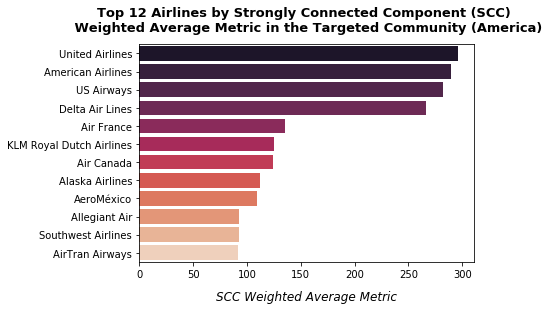

In [128]:
plotresult=airlines_copy3.sort_values('SCC_weighted_metric').nlargest(12,'SCC_weighted_metric')
sns.barplot(x='SCC_weighted_metric',y='Name',data=airlines_copy3,order=plotresult['Name'],palette="rocket")
plt.title('Top 12 Airlines by Strongly Connected Component (SCC) \n Weighted Average Metric in the Targeted Community (America)',fontsize=13, fontweight="bold",pad=13)
plt.ylabel('', fontsize=12, labelpad=13)
plt.xlabel('SCC Weighted Average Metric', fontsize=12, labelpad=11, fontstyle='italic')
plt.show()

Next: We attempt another type of graph similarity measure: GED to measure each airline network with respect to a specific community. This may be useful for domestic airline competition analysis and also frequent domestic customers/flyers.

In [133]:
# Import the GraphEditDistance algorithm to compare two graphs (our target community and the target airline network there)
# gmatch4py is an optimised version of the networkx GraphEditDistance, measuring the extent of similarity by virtue 
# of the graph reconstruction effort. Networkx version is too slow. gmatch4py runs on c++.
## gmatch4py can be downloaded from github: https://github.com/Jacobe2169/GMatch4py.git
import gmatch4py as gm

In [134]:
## Form graph (Graph1) for earlier filtered routes for the target community (filter by the targeted community)
idxs = list(zip(filterroutes.Source_airport_ID.values, filterroutes.Destination_airport_ID.values))

#subset of dists for the specific airline
subset = dists[pd.Series(list(zip(dists.Source_airport_ID, dists.Destination_airport_ID)), index=dists.index).isin(idxs)]

# Create graph from distances dataframe
Graph1 = nx.from_pandas_edgelist(subset,"Source_airport_ID","Destination_airport_ID",["distance"],create_using=nx.DiGraph())

In [136]:
# Function to derive the similarity value between the targeted airline network in our target community 
# and our target community using the GED algorithm
ged=gm.GraphEditDistance(1,1,1,1)

def graph_similarity(airlineid):
    filterroutes2 = filterroutes[filterroutes['Airline_ID']==str(airlineid)]
    idxs = list(zip(filterroutes2.Source_airport_ID.values, filterroutes2.Destination_airport_ID.values))

    # subset of dists for the specific airline
    subset = dists[pd.Series(list(zip(dists.Source_airport_ID, dists.Destination_airport_ID)), index=dists.index).isin(idxs)]

    # Create graph from distances dataframe
    Graph2 = nx.from_pandas_edgelist(subset,"Source_airport_ID","Destination_airport_ID",["distance"],create_using=nx.DiGraph())
    
    # all (rebuilding) edit costs are equal to 1 (i.e. we give balance penalties to all types of edit:
    # such as add vertex, deleting vertex, add node, delete node) and compare graphs
    # the cost can be configured if you wish
    result=gm.GraphEditDistance(1,1,1,1).compare([Graph1,Graph2],None) 
    
    # get results
    return ged.similarity(result)[0][1]

In [137]:
# Run algorithm against the earlier airline dataframe (relating to the same community)
# This takes about 9 mins due to the algo running against each airlines and iterating.
airlines_copy3['GED_similarity']=airlines_copy3['Airline_ID'].progress_apply(graph_similarity)


100%|██████████| 191/191 [09:31<00:00,  3.03s/it]

In [138]:
airlines_copy3.nlargest(5,'GED_similarity')

Airline_ID                      Name Alias IATA ICAO   Callsign  \
137          137                Air France    \N   AF  AFR   AIRFRANS   
3088        3090  KLM Royal Dutch Airlines    \N   KL  KLM        KLM   
5252        5265                US Airways    \N   US  USA    U S AIR   
35            35             Allegiant Air    \N   G4  AAY  ALLEGIANT   
5196        5209           United Airlines    \N   UA  UAL     UNITED   

            Country Active                                    Unique_airports  \
137          France      Y  [4355, 3682, 253, 1382, 4019, 260, 275, 5715, ...   
3088    Netherlands      Y  [628, 580, 4355, 3682, 4019, 260, 1382, 275, 5...   
5252  United States      Y  [4355, 3876, 3752, 3718, 3670, 4019, 3484, 383...   
35    United States      Y  [4355, 3515, 7056, 3617, 4167, 4047, 6505, 387...   
5196  United States      Y  [4355, 3830, 253, 302, 298, 246, 4019, 3751, 3...   

                                            Communities  Communities_no  \
137   [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...              12   
3088  [{4105, 16, 8209, 4130, 4160, 4161, 4162, 4166...              14   
5252  [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...               9   
35    [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...               1   
5196  [{4098, 4099, 4100, 4101, 4103, 4112, 4113, 41...              18   

                                                    SCC  SCC_weighted_metric  \
137   [{3585, 3589, 4112, 4113, 4115, 4116, 3608, 36...           135.035503   
3088  [{3585, 3589, 4112, 4113, 4115, 4116, 3608, 36...           125.277778   
5252  [{3584, 3585, 4099, 3589, 4103, 3596, 4112, 41...           282.041667   
35    [{4099, 4100, 4101, 3598, 4116, 3609, 4127, 36...            93.021053   
5196  [{3585, 4098, 4099, 4100, 3589, 4101, 4103, 35...           296.187097   

      GED_similarity  
137         0.534087  
3088        0.520296  
5252        0.509149  
35          0.477901  
5196        0.466884

In [139]:
# Get rid of '-inf' values in the GED similarity column
airlines_copy3.loc[airlines_copy3['GED_similarity']<0, 'GED_similarity'] = 0

### List below shows the list of airlines in our targeted community (this case: America) and their respective GED similiarity or similarity of their network in this community with respect to the full network of this community:

In [140]:
# The reason why some airlines has metric 0:
# Note that some airlines fly to our target community from another community 
# but never fly within our target community. We are only interested in domestic flights / routes.
airlines_copy3

Airline_ID                                       Name  \
24            24                          American Airlines   
28            28                            Asiana Airlines   
35            35                              Allegiant Air   
90            90                                 Air Europa   
96            96                            Aegean Airlines   
109          109                     Alaska Central Express   
130          130                  Aeroflot Russian Airlines   
137          137                                 Air France   
179          179                                    Aeroper   
214          214                                 Air Berlin   
218          218                          Air India Limited   
221          221                      Air Atlanta Icelandic   
225          225                             Air Tahiti Nui   
321          321                                 AeroMéxico   
324          324                         All Nippon Airways   
330          330                                 Air Canada   
341          341                 Air North Charter - Canada   
345          345                            Air New Zealand   
386          386                                Aero Flight   
412          412                      Aerolineas Argentinas   
439          439                            Alaska Airlines   
462          462                         Astrakhan Airlines   
477          477                           Air Saint Pierre   
491          491                          Austrian Airlines   
502          502                     Abu Dhabi Amiri Flight   
515          515  Avianca - Aerovias Nacionales de Colombia   
567          567                               Air Caraïbes   
596          596                                   Alitalia   
603          603                                  Amaszonas   
622          622                            Aserca Airlines   
...          ...                                        ...   
5533        8809                            Island Air (WP)   
5551        9666                             Virgin Pacific   
5590       10646                        Birmingham European   
5591       10650                               Pal airlines   
5600       10739                             Air Choice One   
5605       10765                           SeaPort Airlines   
5606       10776                                 Salmon Air   
5624       11741                       Air Antilles Express   
5629       11763                          Peruvian Airlines   
5639       11806           Compagnie Africaine d\\'Aviation   
5739       14849                      Aereonautica militare   
5775       16149                   Windward Islands Airways   
5800       16475                   TUR Avrupa Hava YollarÄ±   
5808       16615         Mongolian International Air Lines    
5814       16660                                 AeroWorld    
5828       16726                                 Era Alaska   
5843       16844                                BVI Airways   
5880       17519                             SENIC AIRLINES   
5910       17885                  Interjet (ABC Aerolineas)   
5927       18169                            Patriot Airways   
5930       18232                          BQB Lineas Aereas   
5940       18529                                   T.J. Air   
5956       18700                           SOCHI AIR CHATER   
5972       18944                  Insel Air (7I/INC) (Priv)   
6038       19810                       Regional Air Iceland   
6068       20004                         Volotea Costa Rica   
6106       20565                        Boutique Air (Priv)   
6117       20686                        SkyBahamas Airlines   
6120       20710                        Silver Airways (3M)   
6140       20976                       World Scale Airlines   

                       Alias IATA ICAO         Callsign  \
24                        \N   AA  AAL  

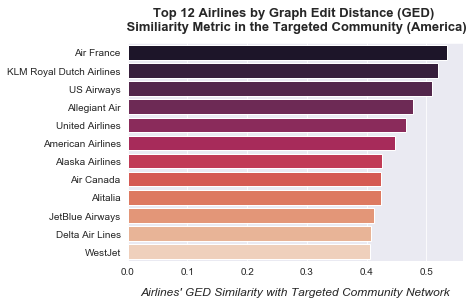

In [141]:
plotresult=airlines_copy3.sort_values('GED_similarity').nlargest(12,'GED_similarity')
sns.set_style("darkgrid")
sns.barplot(x='GED_similarity',y='Name',data=airlines_copy3,order=plotresult['Name'],palette="rocket")
plt.title('Top 12 Airlines by Graph Edit Distance (GED) \n Similiarity Metric in the Targeted Community (America)',fontsize=13, fontweight="bold",pad=13)
plt.ylabel('', fontsize=12, labelpad=13)
plt.xlabel("Airlines' GED Similarity with Targeted Community Network", fontsize=12, labelpad=11, fontstyle='italic')
plt.show()

### The graph below shows the positive correlation between the two measures earlier: Strongly Connected Component (SCC) Weighted Average Score and GED Similiarity Metric:

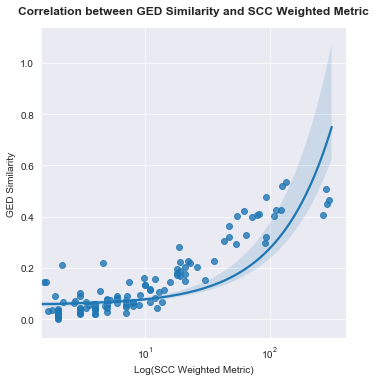

In [142]:
sns.set_style("darkgrid")
g = sns.lmplot(x='SCC_weighted_metric',y='GED_similarity',data=airlines_copy3)
g.set(xscale="log")
g.set_axis_labels('Log(SCC Weighted Metric)', 'GED Similarity')
plt.title('Correlation between GED Similarity and SCC Weighted Metric',
          fontsize=12, fontweight="bold",pad=14)
plt.show()

In [143]:
airlines_copy3['SCC_ranking']=airlines_copy3['SCC_weighted_metric'].rank(ascending=False)
airlines_copy3.sort_values('SCC_weighted_metric',ascending=False)

Airline_ID                                       Name  \
5196        5209                            United Airlines   
24            24                          American Airlines   
5252        5265                                 US Airways   
2008        2009                            Delta Air Lines   
137          137                                 Air France   
3088        3090                   KLM Royal Dutch Airlines   
330          330                                 Air Canada   
439          439                            Alaska Airlines   
321          321                                 AeroMéxico   
4539        4547                         Southwest Airlines   
35            35                              Allegiant Air   
1315        1316                            AirTran Airways   
3027        3029                            JetBlue Airways   
5399        5416                                    WestJet   
2467        2468                          Frontier Airlines   
515          515  Avianca - Aerovias Nacionales de Colombia   
596          596                                   Alitalia   
1888        1889                              Copa Airlines   
4679        4687                            Spirit Airlines   
5330        5347                    Virgin Atlantic Airways   
5308        5325                                    Volaris   
5910       17885                  Interjet (ABC Aerolineas)   
3198        3200                               LAN Airlines   
1885        1886                                   Conviasa   
5590       10646                        Birmingham European   
6120       20710                        Silver Airways (3M)   
1402        1403                                 Bahamasair   
1289        1290                                    Aeromar   
5314        5331                             Virgin America   
1935        1936                         Cubana de Aviación   
...          ...                                        ...   
3208        3210                        LOT Polish Airlines   
4296        4304                         SATA International   
4505        4513                 Servicios de Transportes A   
4525        4533                     Saudi Arabian Airlines   
4242        4248                            Royal Air Maroc   
4600        4608                           Sichuan Airlines   
3866        3871            Pakistan International Airlines   
3830        3835                                     PB Air   
3732        3737                      Norwegian Air Shuttle   
3493        3498                   Midwest Airlines (Egypt)   
3458        3463                                  Meridiana   
4859        4869                               TAP Portugal   
4887        4897                       Thomas Cook Airlines   
4930        4940                 Thai Airways International   
3177        3179                             Kuwait Airways   
2182        2183                                   Emirates   
5003        5013                                 Thomsonfly   
5031        5041                                       TACV   
5057        5067                         Transaero Airlines   
5123        5133                       TAAG Angola Airlines   
3050        3052                            Jetstar Airways   
2998        3000                                Jet Airways   
5268        5281                         Uzbekistan Airways   
5269        5282             Ukraine International Airlines   
2833        2835                                 Icelandair   
2658        2660                            Hainan Airlines   
2637        2638                           Gulf Air Bahrain   
2353        2354                                  First Air   
4297        4305                      South African Airways   
6140       20976                       World Scale Airlines   

                           Alias IATA ICAO               Callsign  \
5196                          

In [144]:
airlines_copy3['GED_ranking']=airlines_copy3['GED_similarity'].rank(ascending=False)
airlines_copy3.sort_values('GED_similarity',ascending=False)

Airline_ID                                       Name  \
137          137                                 Air France   
3088        3090                   KLM Royal Dutch Airlines   
5252        5265                                 US Airways   
35            35                              Allegiant Air   
5196        5209                            United Airlines   
24            24                          American Airlines   
439          439                            Alaska Airlines   
330          330                                 Air Canada   
596          596                                   Alitalia   
3027        3029                            JetBlue Airways   
2008        2009                            Delta Air Lines   
5399        5416                                    WestJet   
321          321                                 AeroMéxico   
1888        1889                              Copa Airlines   
2467        2468                          Frontier Airlines   
5330        5347                    Virgin Atlantic Airways   
515          515  Avianca - Aerovias Nacionales de Colombia   
4539        4547                         Southwest Airlines   
5308        5325                                    Volaris   
5910       17885                  Interjet (ABC Aerolineas)   
1315        1316                            AirTran Airways   
4679        4687                            Spirit Airlines   
3970        3976                          Pinnacle Airlines   
3198        3200                               LAN Airlines   
1402        1403                                 Bahamasair   
1316        1317                                Air Transat   
6120       20710                        Silver Airways (3M)   
1354        1355                            British Airways   
2820        2822                            Iberia Airlines   
5590       10646                        Birmingham European   
...          ...                                        ...   
462          462                         Astrakhan Airlines   
225          225                             Air Tahiti Nui   
218          218                          Air India Limited   
214          214                                 Air Berlin   
96            96                            Aegean Airlines   
90            90                                 Air Europa   
2219        2220                         Ethiopian Airlines   
2353        2354                                  First Air   
2637        2638                           Gulf Air Bahrain   
2658        2660                            Hainan Airlines   
4887        4897                       Thomas Cook Airlines   
4859        4869                               TAP Portugal   
4600        4608                           Sichuan Airlines   
4525        4533                     Saudi Arabian Airlines   
4505        4513                 Servicios de Transportes A   
4311        4319               Scandinavian Airlines System   
4297        4305                      South African Airways   
4296        4304                         SATA International   
4242        4248                            Royal Air Maroc   
3866        3871            Pakistan International Airlines   
3830        3835                                     PB Air   
3732        3737                      Norwegian Air Shuttle   
3493        3498                   Midwest Airlines (Egypt)   
3458        3463                                  Meridiana   
3208        3210                        LOT Polish Airlines   
3177        3179                             Kuwait Airways   
3050        3052                            Jetstar Airways   
2998        3000                                Jet Airways   
2833        2835                                 Icelandair   
6140       20976                       World Scale Airlines   

                           Alias IATA ICAO         Callsign         Country  \
137                 

### List below shows the list of airlines in our targeted community (this case: America) and their combined performances in SCC weighted score and GED similiarity:

We normalised their scores for each measure: dividing each score by the maximum score achieved, before summing up both normalised scores for overall scoring. We then rank the airlines by their overall scoring and sort in the list below.

In [145]:
maxged=max(airlines_copy3['GED_similarity'])
maxscc=max(airlines_copy3['SCC_weighted_metric'])
def combinedscores(x):
    return (x['SCC_weighted_metric']/maxscc)+(x['GED_similarity']/maxged)

In [146]:
airlines_copy3['combined_scores'] = airlines_copy3.apply(combinedscores, axis=1)

In [147]:
airlines_copy3.sort_values('combined_scores',ascending=False)

Airline_ID                                       Name  \
5252        5265                                 US Airways   
5196        5209                            United Airlines   
24            24                          American Airlines   
2008        2009                            Delta Air Lines   
137          137                                 Air France   
3088        3090                   KLM Royal Dutch Airlines   
330          330                                 Air Canada   
35            35                              Allegiant Air   
439          439                            Alaska Airlines   
321          321                                 AeroMéxico   
3027        3029                            JetBlue Airways   
5399        5416                                    WestJet   
596          596                                   Alitalia   
2467        2468                          Frontier Airlines   
1888        1889                              Copa Airlines   
4539        4547                         Southwest Airlines   
1315        1316                            AirTran Airways   
5330        5347                    Virgin Atlantic Airways   
515          515  Avianca - Aerovias Nacionales de Colombia   
5308        5325                                    Volaris   
4679        4687                            Spirit Airlines   
5910       17885                  Interjet (ABC Aerolineas)   
3970        3976                          Pinnacle Airlines   
3198        3200                               LAN Airlines   
1402        1403                                 Bahamasair   
6120       20710                        Silver Airways (3M)   
1316        1317                                Air Transat   
5590       10646                        Birmingham European   
1935        1936                         Cubana de Aviación   
1354        1355                            British Airways   
...          ...                                        ...   
96            96                            Aegean Airlines   
90            90                                 Air Europa   
2658        2660                            Hainan Airlines   
5591       10650                               Pal airlines   
2833        2835                                 Icelandair   
2998        3000                                Jet Airways   
4887        4897                       Thomas Cook Airlines   
4930        4940                 Thai Airways International   
4525        4533                     Saudi Arabian Airlines   
4505        4513                 Servicios de Transportes A   
5003        5013                                 Thomsonfly   
5031        5041                                       TACV   
5057        5067                         Transaero Airlines   
5123        5133                       TAAG Angola Airlines   
4311        4319               Scandinavian Airlines System   
4297        4305                      South African Airways   
4296        4304                         SATA International   
5268        5281                         Uzbekistan Airways   
5269        5282             Ukraine International Airlines   
4242        4248                            Royal Air Maroc   
3866        3871            Pakistan International Airlines   
3830        3835                                     PB Air   
3732        3737                      Norwegian Air Shuttle   
3493        3498                   Midwest Airlines (Egypt)   
3458        3463                                  Meridiana   
3208        3210                        LOT Polish Airlines   
3177        3179                             Kuwait Airways   
5532        8745                           Transavia France   
3050        3052                            Jetstar Airways   
6140       20976                       World Scale Airlines   

                           Alias IATA ICAO               Callsign  \
5252                          

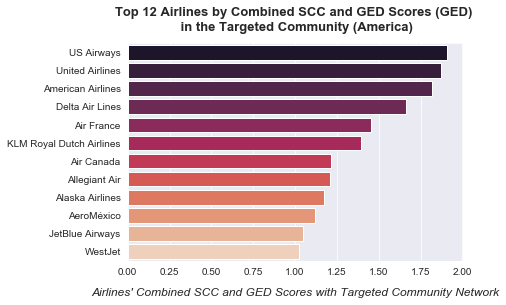

In [148]:
plotresult=airlines_copy3.sort_values('combined_scores').nlargest(12,'combined_scores')
sns.set_style("darkgrid")
sns.barplot(x='combined_scores',y='Name',data=airlines_copy3,order=plotresult['Name'],palette="rocket")
plt.title('Top 12 Airlines by Combined SCC and GED Scores (GED) \n in the Targeted Community (America)',fontsize=13, fontweight="bold",pad=13)
plt.ylabel('', fontsize=12, labelpad=13)
plt.xlabel("Airlines' Combined SCC and GED Scores with Targeted Community Network", fontsize=12, labelpad=11, fontstyle='italic')
plt.show()

### List below shows the top 12 airlines in our targeted community (this case: America) with the combined best SCC score and GED similiarity with respect to this community:

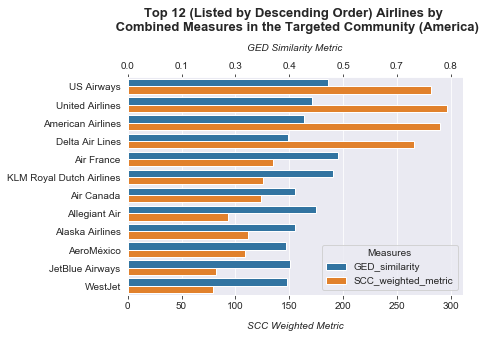

In [149]:
plotresult=airlines_copy3.sort_values('combined_scores').nlargest(12,'combined_scores')
plotresult1=plotresult[['Name','GED_similarity','SCC_weighted_metric']]

# working example but with unreadable values_a and values_b
test_data_melted1 = pd.melt(plotresult1, id_vars="Name",\
                            var_name="Measures", value_name="value_numbers")

mask = test_data_melted1.Measures.isin(['GED_similarity'])
scale = int(test_data_melted1[~mask].value_numbers.mean()/test_data_melted1[mask].value_numbers.mean())
test_data_melted1.loc[mask, 'value_numbers'] = test_data_melted1.loc[mask, 'value_numbers']*scale

fig, ax1 = plt.subplots()
sns.set_style("dark")
g = sns.barplot(y="Name", x="value_numbers", hue="Measures",\
                data=test_data_melted1,ax=ax1)
ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticklabels(np.round(ax1.get_xticks()/scale,1))

ax1.set_xlabel('SCC Weighted Metric',fontsize=10, labelpad=11, fontstyle='italic')
ax2.set_xlabel('GED Similarity Metric',fontsize=10, labelpad=11, fontstyle='italic')
ax1.set_ylabel('')
plt.title('Top 12 (Listed by Descending Order) Airlines by \n Combined Measures in the Targeted Community (America)',
          fontsize=13, fontweight="bold",pad=13)

plt.show()

### We visualise some of the airlines' network specific to our target community (America) (Note: We stripped off routes going into or out of our target community and focus on only routes within this community).

We take the best airline from our above analysis: US Airways, and visualise its network versus another lowly ranked airline: WestJet to better appreciate their performance differences with respect to our targeted community (America). Let's first look at the full network of our detected community (America), which represent all the combined airlines' routes in this community.

### Full Network in our Detected Community (America) (i.e. All Airlines' Routes Combined)

In [150]:
# Load the filtered route for the community (America). This filterroutes for America was prepared in the earlier analysis.
turkey_airline = filterroutes

In [151]:
map_turkey = folium.Map(tiles="openstreetmap")
turkey_points = []
airports_key_id = airports.set_index('Airport_ID')

# Put points in
for index, t_a in turkey_airline.iterrows():
    src_airport_id = t_a['Source_airport_ID']
    dest_airport_id = t_a['Destination_airport_ID']
    
    if src_airport_id not in turkey_points:
        turkey_points.append(src_airport_id)
    
    if dest_airport_id not in turkey_points:
        turkey_points.append(dest_airport_id)

# Draw the point
for airport_id in turkey_points:
    airport = airports_key_id.loc[airport_id]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                    radius=2,
                    fill=True,
                    opacity=0.0,
                    fill_color=airport_id_color[airport_id],
                    fill_opacity=0.7
                   ).add_to(map_turkey)

# Draw the lines
for index, route in turkey_airline.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.5, opacity=1).add_to(map_turkey)

map_turkey.save('data/map_community_america.html')

In [ ]:
# Too large to load in jupyter. See above saved html version.
map_turkey

### Network of US Airways (Ranked 1st) in Detected Community (America)

In [152]:
turkey_airline = filterroutes[filterroutes['Airline_ID']==str(5265)]

In [153]:
map_turkey = folium.Map(tiles="openstreetmap")
turkey_points = []
airports_key_id = airports.set_index('Airport_ID')

# Put points in
for index, t_a in turkey_airline.iterrows():
    src_airport_id = t_a['Source_airport_ID']
    dest_airport_id = t_a['Destination_airport_ID']
    
    if src_airport_id not in turkey_points:
        turkey_points.append(src_airport_id)
    
    if dest_airport_id not in turkey_points:
        turkey_points.append(dest_airport_id)

# Draw the point
for airport_id in turkey_points:
    airport = airports_key_id.loc[airport_id]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                    radius=2,
                    fill=True,
                    opacity=0.0,
                    fill_color=airport_id_color[airport_id],
                    fill_opacity=0.7
                   ).add_to(map_turkey)

# Draw the lines
for index, route in turkey_airline.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.5, opacity=1).add_to(map_turkey)

map_turkey.save('data/map_turkey.html')

In [154]:
map_turkey

### Network of WestJet (Ranked 12th) in Detected Community (America)

In [155]:
turkey_airline = filterroutes[filterroutes['Airline_ID']==str(5416)]

In [156]:
map_turkey = folium.Map(tiles="openstreetmap")
turkey_points = []
airports_key_id = airports.set_index('Airport_ID')

# Put points in
for index, t_a in turkey_airline.iterrows():
    src_airport_id = t_a['Source_airport_ID']
    dest_airport_id = t_a['Destination_airport_ID']
    
    if src_airport_id not in turkey_points:
        turkey_points.append(src_airport_id)
    
    if dest_airport_id not in turkey_points:
        turkey_points.append(dest_airport_id)

# Draw the point
for airport_id in turkey_points:
    airport = airports_key_id.loc[airport_id]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                    radius=2,
                    fill=True,
                    opacity=0.0,
                    fill_color=airport_id_color[airport_id],
                    fill_opacity=0.7
                   ).add_to(map_turkey)

# Draw the lines
for index, route in turkey_airline.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.5, opacity=1).add_to(map_turkey)

map_turkey.save('data/map_turkey.html')

You should be able to observe a significant difference in domestic route density and span versus the earlier top airline in our targeted community (America). This validates our earlier measures.

In [157]:
map_turkey

## C.4. Configuration of an Airline's Strongly-Connected Components in a Directed Graph

Here we look specifically at an airline's strongly-connected components and intepret its components configuration and impact to its business.

We analysed two airlines' SCC below and noted generally they have one large component + a few other insignificant components. This may be reasonable as compared to a configuration consisting of several balanced / large components. In a configuration of several balanced / large components, the airline may potentially lose revenue from the lack of return trips from one large component to another or the related customer to another more connected competitor altogether, unless they are partnering with another airline for those trips. Hence, a configuration like {99:1:1:1} is likely more favourable than a configuration like {50:30:22}.

### Strongly-connected Components for Airline: Singapore Airline (Directed graph)

In [158]:
print(f"Number of airports: {len(airlines_copy.loc[airlines_copy['Airline_ID']==4435,'Unique_airports'].values[0])}")

Number of airports: 102


In [159]:
# Key in the Airline abbreviation
turkey_airline = routes[routes['Airline']=='SQ']

idxs = list(zip(turkey_airline.Source_airport_ID.values, turkey_airline.Destination_airport_ID.values))

#subset of dists for the specific airline
subset = dists[pd.Series(list(zip(dists.Source_airport_ID, dists.Destination_airport_ID)), index=dists.index).isin(idxs)]

# Create graph from distances dataframe
G = nx.from_pandas_edgelist(subset, 
                            "Source_airport_ID",
                           "Destination_airport_ID",
                           ["distance"],create_using=nx.DiGraph())

In [160]:
# Print the different sets of strongly connected components and their respective number of airports within:
[len(c) for c in sorted(nx.strongly_connected_components(G),key=len, reverse=True)]

[99, 1, 1, 1]

In [161]:
# Print the above small disconnected airports (minus away the largest strongly connected subgraphs)
[c for c in sorted(nx.strongly_connected_components(G),key=len, reverse=True)][1:]

[{1335}, {3830}, {3748}]

In [162]:
# Total airports tally: checked.
sum([len(c) for c in sorted(nx.strongly_connected_components(G),key=len, reverse=True)])

102

### Strongly-connected Components for Airline: US Airways (Directed graph)

In [163]:
print(f"Number of airports: {len(airlines_copy.loc[airlines_copy['Airline_ID']==5265,'Unique_airports'].values[0])}")

Number of airports: 352


In [164]:
# Key in the Airline abbreviation
turkey_airline = routes[routes['Airline']=='US']

idxs = list(zip(turkey_airline.Source_airport_ID.values, turkey_airline.Destination_airport_ID.values))

#subset of dists for the specific airline
subset = dists[pd.Series(list(zip(dists.Source_airport_ID, dists.Destination_airport_ID)), index=dists.index).isin(idxs)]

# Create graph from distances dataframe
G = nx.from_pandas_edgelist(subset, 
                            "Source_airport_ID",
                           "Destination_airport_ID",
                           ["distance"],create_using=nx.DiGraph())

In [165]:
# Print the different sets of strongly connected components and their respective number of airports within:
[len(c) for c in sorted(nx.strongly_connected_components(G),key=len, reverse=True)]

[333, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [166]:
# Print the above small disconnected airports (minus away the largest strongly connected subgraphs)
[c for c in sorted(nx.strongly_connected_components(G),key=len, reverse=True)][1:]

[{2006},
 {4285},
 {3862},
 {4336},
 {1197},
 {1479},
 {1665},
 {1354},
 {1246},
 {1216},
 {1253},
 {3351},
 {3339},
 {3361},
 {3320},
 {3341},
 {3322},
 {1960},
 {1969}]

In [167]:
sum([len(c) for c in sorted(nx.strongly_connected_components(G),key=len, reverse=True)])

352